This notebook uses the network created by ```Topology_clique_activity_experiment.ipynb```, and ablates all connections to run a reference unconnected run.

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example."

network_path = "topology100"
network_file = os.path.join(network_path, "network-synapses.hdf5")
simplex_file_name = os.path.join(network_path, "test100_D6_simplices0.simplices")
ablated_network_file = os.path.join(network_path, "network-fully-ablated.hdf5")

remove_sink_to_source_connections = True

In [2]:
from snudda.analyse.analyse_topology import SnuddaAnalyseTopology
sat = SnuddaAnalyseTopology(network_file=network_file)
sat.load_simplex_file(simplex_file_name=simplex_file_name)
mult = sat.get_fixed_multiplicity()

Loading 99 neurons with 9480 synapses and 0 gap junctions
Loading 99 neurons with 9480 synapses and 0 gap junctions
Loaded simplex data of dimension 6 from topology100/test100_D6_simplices0.simplices


Next in this example we list the cliques with multiplicity 3. To see all of them simply inspect mult[6]. Here the 6 refers to the clique dimension we loaded. You could also load multiple clique dimension files at the same time and compare them.

In [3]:
[(x[0], x[1]) for x in mult[6].items() if x[1] == 3]

[((0, 1, 9, 15, 22, 38, 18), 3),
 ((0, 1, 9, 15, 38, 67, 18), 3),
 ((0, 1, 4, 10, 15, 88, 40), 3),
 ((0, 1, 15, 20, 38, 42, 67), 3),
 ((0, 1, 15, 38, 42, 67, 20), 3),
 ((0, 1, 15, 22, 42, 88, 38), 3),
 ((0, 1, 15, 42, 67, 88, 20), 3),
 ((0, 1, 20, 38, 42, 88, 67), 3),
 ((0, 1, 15, 20, 38, 73, 67), 3),
 ((0, 1, 15, 38, 67, 73, 18), 3),
 ((0, 1, 15, 38, 67, 73, 20), 3),
 ((0, 1, 15, 40, 67, 73, 20), 3),
 ((0, 1, 15, 67, 73, 88, 20), 3),
 ((0, 1, 20, 38, 73, 88, 67), 3),
 ((0, 1, 40, 73, 82, 88, 15), 3),
 ((0, 1, 40, 73, 82, 88, 20), 3),
 ((0, 1, 15, 73, 82, 88, 20), 3),
 ((0, 1, 15, 73, 82, 88, 38), 3),
 ((0, 1, 38, 73, 82, 88, 15), 3),
 ((0, 1, 38, 73, 82, 88, 20), 3),
 ((0, 1, 9, 73, 82, 88, 15), 3),
 ((0, 1, 9, 73, 82, 88, 38), 3),
 ((0, 1, 20, 73, 82, 88, 38), 3),
 ((0, 4, 10, 15, 72, 88, 40), 3),
 ((0, 10, 15, 22, 72, 88, 40), 3),
 ((0, 10, 15, 40, 72, 88, 4), 3),
 ((0, 10, 15, 40, 72, 88, 22), 3),
 ((0, 10, 15, 22, 72, 82, 18), 3),
 ((0, 13, 15, 20, 36, 45, 59), 3),
 ((0, 13, 15, 2

In [4]:
selected_clique_neurons = list(mult[6])[0]

In [5]:
selected_clique_neurons

(0, 1, 9, 15, 22, 38, 18)

### Ablating network

In [6]:
from snudda.utils.ablate_network import SnuddaAblateNetwork
san = SnuddaAblateNetwork(network_file=network_file)
san.only_keep_neuron_id(selected_clique_neurons)

Loading 99 neurons with 9480 synapses and 0 gap junctions


The cell below removes sink to source connections if the ```remove_sink_to_source``` flag is set.

In [7]:
san.ablate_all_synapses()

Note that the neurons get remapped, when we ablate the network and remove a subset of the neurons.

In [8]:
san.write_network(out_file_name=ablated_network_file, print_remapping=True)

Writing to topology100/network-fully-ablated.hdf5
Copying morphologies
Keeping 7 neurons.

Remapping neurons:
0 the same
1 the same
38 -> 2
9 -> 3
15 -> 4
18 -> 5
22 -> 6

0/0 synapses processed
Filtering done.
Copying synapses and gap junctions
9480 / 0 synapse rows parsed
Synapse matrix written.
Keeping 0 synapses (out of 9480)
0 / 0 gap junction rows parsed
Gap junction matrix written.
Keeping 0  gap junctions (out of 0)


### Simulating network

Next step is running the network with current injections (we should also run it with synaptic input).

#### NEED TO CHANGE TO BasalGangliaData

In [9]:
experiment_config_file = "topology_clique_simulation_experiment-6a.json"
from snudda.simulate.pair_recording import PairRecording 
pr = PairRecording(network_path=network_path, network_file=ablated_network_file,
                   experiment_config_file=experiment_config_file)

Pair recording output file: topology100/simulation/TCS-output-6a.hdf5
Loading 7 neurons with 0 synapses and 0 gap junctions
Setting tmGabaA reversal potential to -65.0 mV


In [10]:
pr.run()

Running simulation for 1.0 s
Running Neuron simulator 1000 ms, with dt=0.025
1% done. Elapsed: 2.4 s, estimated time left: 233.9 s
27% done. Elapsed: 102.7 s, estimated time left: 277.6 s
61% done. Elapsed: 204.5 s, estimated time left: 130.7 s
93% done. Elapsed: 304.9 s, estimated time left: 22.9 s
99% done. Elapsed: 349.1 s, estimated time left: 3.5 s
Neuron simulation finished
Simulation run time: 355.1 s
Writing network output to topology100/simulation/TCS-output-6a.hdf5


Loading network info from topology100/network-fully-ablated.hdf5
Loading 7 neurons with 0 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6a.hdf5
Plotting traces: [1, 2, 3, 4, 5, 6]
Plotted 6 traces (total 6)


<IPython.core.display.Javascript object>


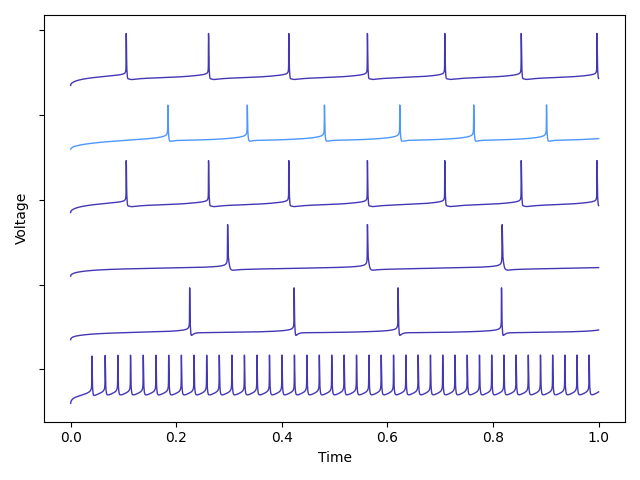

Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/Topology/topology100/figures/Network-voltage-trace-TopologyClique-6a-iSPN-dSPN.pdf


In [11]:
%matplotlib notebook
pr.plot_trace_overview()

In [12]:
pr.plot_traces()